In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandasql as ps

%pylab inline


import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


# Brazilian E-commerce Olist 

In [2]:
#tables used - orders, payments, items, reviews, customers, products datasets

In [3]:
olist_df = pd.read_csv('olist_df.csv')

In [ ]:
SELECT MemberID, LastName, FirstName, Handicap,
     AVG(Handicap * 1.0) OVER() AS Average,
     Handicap - AVG(Handicap *1.0) OVER() AS Difference
FROM Member;
six_query = "SELECT *, min(order_purchase_timestamp) over() as first_purchase from olist_df"
six_output = ps.sqldf(six_query,locals())
six_output.head()

In [12]:
first_query = "SELECT *, min(order_purchase_timestamp) over(partition by customer_unique_id) as first_purchase from olist_df"
first_output = ps.sqldf(first_query,locals())
first_output.head()

,Unnamed: 0,customer_unique_id,order_purchase_timestamp,order_id,payment_value,payment_installments,payment_type,price,review_score,freight_value,product_weight_g,customer_state,first_purchase
0,57122,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,e22acc9c116caa3f2b7121bbb380d08e,141.90,8,credit_card,129.90,5,12.00,1500.0,SP,2018-05-10
1,60187,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,3594e05a005ac4d06a72673270ef9ec9,27.19,1,credit_card,18.90,4,8.29,375.0,SP,2018-05-07
2,86452,0000f46a3911fa3c0805444483337064,2017-03-10,b33ec3b699337181488304f362a6b734,86.22,8,credit_card,69.00,3,17.22,1500.0,SC,2017-03-10
3,113301,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,41272756ecddd9a9ed0180413cc22fb6,43.62,4,credit_card,25.99,4,17.63,150.0,PA,2017-10-12
4,97310,0004aac84e0df4da2b147fca70cf8255,2017-11-14,d957021f1127559cd947b62533f484f7,196.89,6,credit_card,180.00,5,16.89,6050.0,SP,2017-11-14


In [19]:
six_query_con = "SELECT *, (first_purchase * 180) as six_month  from six_output"
six_output_con = ps.sqldf(six_query_con,locals())
six_output_con.head(20)

,Unnamed: 0,customer_unique_id,order_purchase_timestamp,order_id,payment_value,payment_installments,payment_type,price,review_score,freight_value,product_weight_g,customer_state,first_purchase,six_month
0,57122,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,e22acc9c116caa3f2b7121bbb380d08e,141.90,8,credit_card,129.90,5,12.00,1500.0,SP,2018-05-10,363240
1,60187,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,3594e05a005ac4d06a72673270ef9ec9,27.19,1,credit_card,18.90,4,8.29,375.0,SP,2018-05-07,363240
2,86452,0000f46a3911fa3c0805444483337064,2017-03-10,b33ec3b699337181488304f362a6b734,86.22,8,credit_card,69.00,3,17.22,1500.0,SC,2017-03-10,363060
3,113301,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,41272756ecddd9a9ed0180413cc22fb6,43.62,4,credit_card,25.99,4,17.63,150.0,PA,2017-10-12,363060
4,97310,0004aac84e0df4da2b147fca70cf8255,2017-11-14,d957021f1127559cd947b62533f484f7,196.89,6,credit_card,180.00,5,16.89,6050.0,SP,2017-11-14,363060
5,79655,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05,3e470077b690ea3e3d501cffb5e0c499,166.98,8,credit_card,154.00,4,12.98,3000.0,SP,2018-04-05,363240
6,79212,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20,d0028facea13f508e880202d7097a5a1,35.38,1,boleto,27.99,4,7.39,300.0,SP,2018-04-20,363240
7,47117,00053a61a98854899e70ed204dd4bafe,2018-02-28,44e608f2db00c74a1fe329de44416a4e,419.18,3,credit_card,191.00,1,18.59,1175.0,PR,2018-02-28,363240
8,54655,00053a61a98854899e70ed204dd4bafe,2018-02-28,44e608f2db00c74a1fe329de44416a4e,419.18,3,credit_card,191.00,1,18.59,1092.0,PR,2018-02-28,363240
9,20001,0005e1862207bf6ccc02e4228effd9a0,2017-03-04,ae76bef74b97bcb0b3e355e60d9a6f9c,150.12,3,credit_card,135.00,4,15.12,2250.0,RJ,2017-03-04,363060


# Majority of customers only ordered once

In [99]:

cus_query = "SELECT count(customer_unique_id) from olist_df group by customer_unique_id having count(customer_unique_id) in (1, 2, 3, 4, 5)"
cus_output = ps.sqldf(cus_query,locals())
cus_output.head()

,count(customer_unique_id)
0,1
1,1
2,1
3,1
4,1


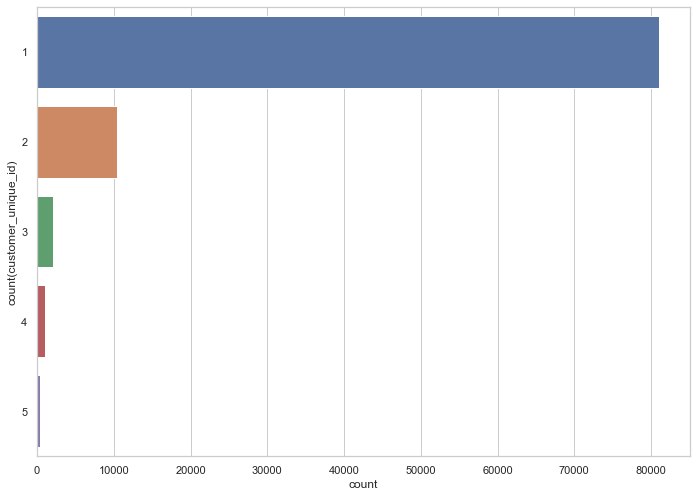

In [103]:
ax = sns.countplot(y = 'count(customer_unique_id)', data = cus_output)

In [48]:
state_count = olist_df['customer_state'].value_counts()
state_count.head(10)

SP    49861
RJ    15424
MG    13715
RS     6536
PR     5985
SC     4316
BA     4069
DF     2499
GO     2453
ES     2351
Name: customer_state, dtype: int64

# Most orders come from Sao Paulo

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

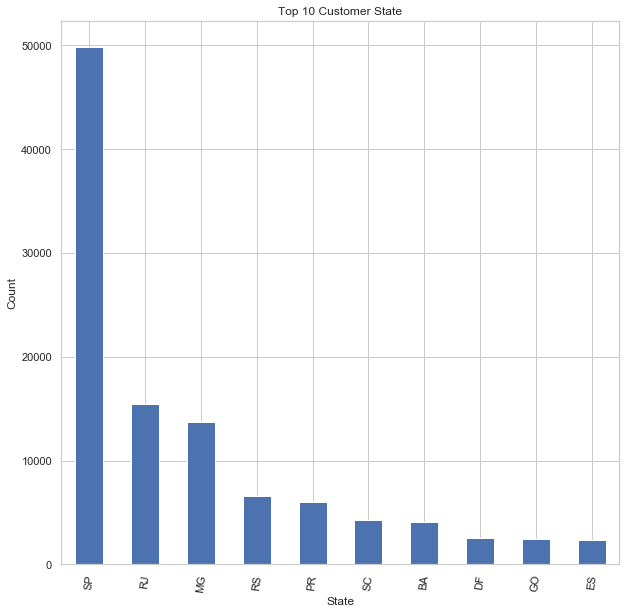

In [108]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.gca()    
state_count.head(10).plot.bar(ax = ax)  
ax.set_title('Top 10 Customer State')  
ax.set_xlabel('State')  
ax.set_ylabel('Count') 
plt.xticks(rotation=83)

# Customers overwhemingly used credit cards as their payment method.

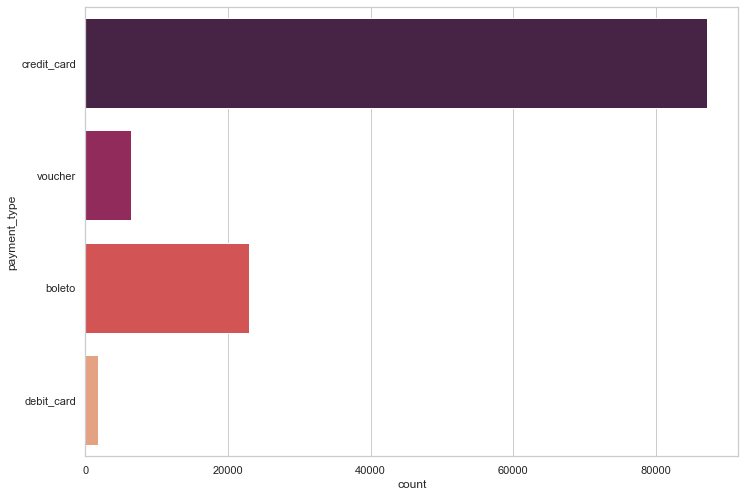

In [76]:
ax = sns.countplot(y = 'payment_type', data = olist_df, palette = "rocket")

# Review scores on orders were generally positive.

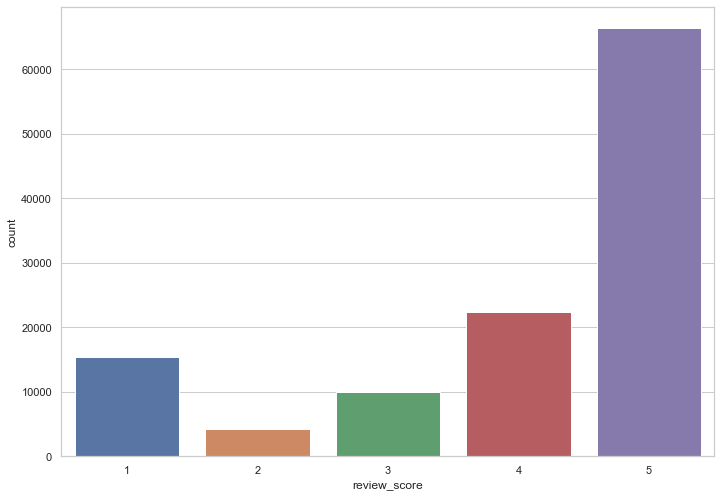

In [54]:
ax = sns.countplot(x = 'review_score', data = olist_df)

# Most items ordered weighed well below 5000 g.

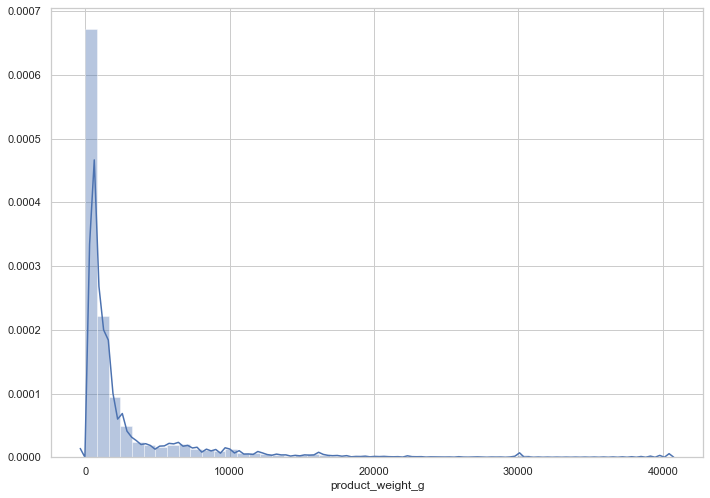

In [55]:
sns.distplot(olist_df["product_weight_g"], kde = True)

In [74]:
installments_count = olist_df['payment_installments'].value_counts()
installments_count.head(100)

1     58934
2     13767
3     11829
4      8021
10     6922
5      6058
8      5108
6      4652
7      1837
9       730
12      166
15       93
18       38
24       34
11       25
20       21
13       19
14       16
16        7
17        7
21        6
0         3
23        1
22        1
Name: payment_installments, dtype: int64

# Majority of customers paid in 1 installment.

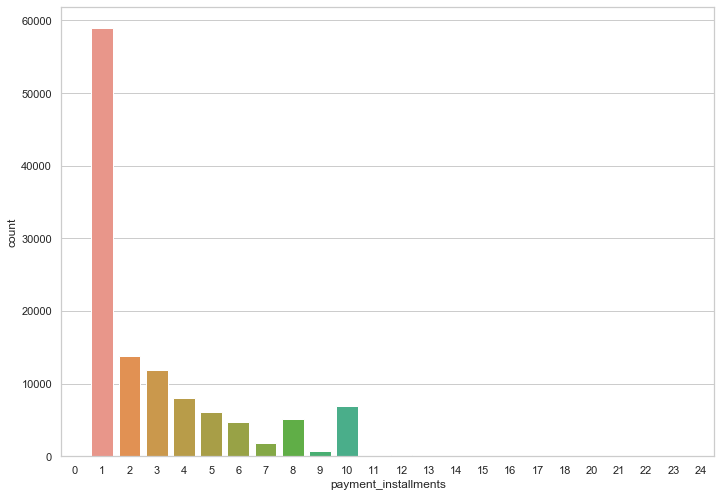

In [75]:
ax = sns.countplot(x = 'payment_installments', data = olist_df)

In [3]:
olist_df.head()

,Unnamed: 0,customer_unique_id,order_purchase_timestamp,order_id,payment_value,payment_installments,payment_type,price,review_score,freight_value,product_weight_g,customer_state
0,0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,18.12,1,credit_card,29.99,4,8.72,500.0,SP
1,1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,2.00,1,voucher,29.99,4,8.72,500.0,SP
2,2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,18.59,1,voucher,29.99,4,8.72,500.0,SP
3,3,3a51803cc0d012c3b5dc8b7528cb05f7,2017-08-15,128e10d95713541c87cd1a2e48201934,37.77,3,credit_card,29.99,4,7.78,500.0,SP
4,4,ef0996a1a279c26e7ecbd737be23d235,2017-08-02,0e7e841ddf8f8f2de2bad69267ecfbcf,37.77,1,credit_card,29.99,5,7.78,500.0,SP


In [106]:
#query

olist_query = "SELECT *,count(customer_unique_id) as count, sum(payment_value) as lifetime_value, avg(review_score) as avg_review_score, avg(payment_installments) as avg_payment_installments, avg(product_weight_g) as avg_product_weight FROM olist_df GROUP BY customer_unique_id ORDER BY count asc"
olist_output = ps.sqldf(olist_query,locals())
olist_output.head()

,Unnamed: 0,customer_unique_id,order_purchase_timestamp,order_id,payment_value,payment_installments,payment_type,price,review_score,freight_value,product_weight_g,customer_state,count,lifetime_value,avg_review_score,avg_payment_installments,avg_product_weight
0,57122,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,e22acc9c116caa3f2b7121bbb380d08e,141.90,8,credit_card,129.90,5,12.00,1500.0,SP,1,141.90,5.0,8.0,1500.0
1,60187,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,3594e05a005ac4d06a72673270ef9ec9,27.19,1,credit_card,18.90,4,8.29,375.0,SP,1,27.19,4.0,1.0,375.0
2,86452,0000f46a3911fa3c0805444483337064,2017-03-10,b33ec3b699337181488304f362a6b734,86.22,8,credit_card,69.00,3,17.22,1500.0,SC,1,86.22,3.0,8.0,1500.0
3,113301,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,41272756ecddd9a9ed0180413cc22fb6,43.62,4,credit_card,25.99,4,17.63,150.0,PA,1,43.62,4.0,4.0,150.0
4,97310,0004aac84e0df4da2b147fca70cf8255,2017-11-14,d957021f1127559cd947b62533f484f7,196.89,6,credit_card,180.00,5,16.89,6050.0,SP,1,196.89,5.0,6.0,6050.0


# Regression model

In [107]:

formula = 'lifetime_value ~ + avg_review_score + C(customer_state) + C(payment_type) + count + avg_payment_installments + avg_product_weight'

fitted_model = smf.ols(formula=formula, data=olist_output).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifetime_value   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     699.6
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:08:53   Log-Likelihood:            -7.4236e+05
No. Observations:               95406   AIC:                         1.485e+06
Df Residuals:                   95372   BIC:                         1.485e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -84.8043     66.501     -1.275      0.202    -215.145      45.536
C(customer_state)[T.AL]          -28.0750     72.141     -0.389      0.697    -169.470     113.320
C(customer_state)[T.AM]          -57.6423     82.023     -0.703      0.482    -218.407     103.122
C(customer_state)[T.AP]           18.7709     96.829      0.194      0.846    -171.013     208.555
C(customer_state)[T.BA]          -78.1370     66.824     -1.169      0.242    -209.112      52.838
C(customer_state)[T.CE]          -45.6939     67.970     -0.672      0.501    -178.914      87.527
C(customer_state)[T.DF]          -76.7807     67.274     -1.141      0.254    -208.636      55.075
C(customer_state)[T.ES]          -94.2819     67.336     -1.400      0.161    -226.260      37.697
C(customer_state)[T.GO]          -51.0389     67.346     -0.758      0.449    -183.036      80.959
C(customer_state)[T.MA]          -28.9078     69.497     -0.416      0.677    -165.121     107.306
C(customer_state)[T.MG]         -101.7586     66.276     -1.535      0.125    -231.658      28.141
C(customer_state)[T.MS]          -82.1990     69.647     -1.180      0.238    -218.706      54.308
C(customer_state)[T.MT]          -51.0605     68.906     -0.741      0.459    -186.115      83.994
C(customer_state)[T.PA]          -34.2395     68.689     -0.498      0.618    -168.869     100.390
C(customer_state)[T.PB]           14.3899     70.821      0.203      0.839    -124.419     153.198
C(customer_state)[T.PE]          -67.8554     67.616     -1.004      0.316    -200.382      64.671
C(customer_state)[T.PI]          -27.3270     71.148     -0.384      0.701    -166.776     112.122
C(customer_state)[T.PR]          -84.5420     66.572     -1.270      0.204    -215.023      45.939
C(customer_state)[T.RJ]          -94.0198     66.256     -1.419      0.156    -223.882      35.842
C(customer_state)[T.RN]          -65.2644     71.241     -0.916      0.360    -204.896      74.367
C(customer_state)[T.RO]          -54.1270     76.102     -0.711      0.477    -203.286      95.032
C(customer_state)[T.RR]           -9.6987    108.753     -0.089      0.929    -222.854     203.457
C(customer_state)[T.RS]          -99.6760     66.531     -1.498      0.134    -230.076      30.724
C(customer_state)[T.SC]          -85.9531     66.769     -1.287      0.198    -216.820      44.914
C(customer_state)[T.SE]          -61.9126     73.226     -0.846      0.398    -205.435      81.609
C(customer_state)[T.SP]         -111.6288     66.114     -1.688      0.091    -241.212      17.954
C(customer_state)[T.TO]          -67.4865     74.815     -0.902      0.367    -214.123      79.150
C(payment_type)[T.credit_card]   -72.5493      5.114    -14.186      0.000     -82.573     -62.525
C(payment_type